<a href="https://colab.research.google.com/github/ymei9/HR_Analytics_DS/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [19]:
df = pd.read_csv("/content/drive/My Drive/Humana/2021_Competition_Training.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,8,9,11,13,16,20,26,28,29,31,33,51,55,58,62,64,66,68,75,85,102,124,127,131,132,135,160,174,180,187,192,202,209,210,211,215,220,230,234,240,243,247,251,255,261,285,293,297,300,305,306,309,323,334,344,345,352,353,355,359) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,auth_3mth_acute_ckd,bh_ncal_pmpm_ct,src_div_id,total_bh_copay_pmpm_cost_t_9-6-3m_b4,bh_ip_snf_net_paid_pmpm_cost_3to6m_b4,cons_chmi,mcc_ano_pmpm_ct_t_9-6-3m_b4,auth_3mth_post_acute_trm,rx_maint_pmpm_cost_t_12-9-6m_b4,auth_3mth_post_acute_rsk,cons_ltmedicr,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,rx_nonbh_pmpm_cost_t_9-6-3m_b4,atlas_pct_laccess_nhna15,auth_3mth_acute_vco,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,auth_3mth_dc_ltac,cons_lwcm10,auth_3mth_post_acute_inj,atlas_fsrpth14,auth_3mth_dc_home,atlas_wicspth12,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4,cons_hxmioc,rx_generic_pmpm_cost_t_6-3-0m_b4,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,...,bh_ip_snf_admit_days_pmpm_t_9-6-3m_b4,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4,zip_cd,auth_3mth_post_acute_ckd,atlas_pct_laccess_nhpi15,auth_3mth_post_acute_ner,auth_3mth_post_er,credit_num_consumerfinance_new,rx_gpi2_49_pmpm_cost_0to3m_b4,cons_chva,atlas_avghhsize,rx_overall_net_paid_pmpm_cost_6to9m_b4,atlas_ownhomepct,atlas_orchard_farms12,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4,atlas_pct_fmrkt_wic16,rx_gpi2_33_pmpm_ct_0to3m_b4,auth_3mth_post_acute_chf,rwjf_social_associate_rate,atlas_freshveg_farms12,auth_3mth_acute_ccs_042,auth_3mth_post_acute_inf,auth_3mth_acute_sns,days_since_last_clm_0to3m_b4,auth_3mth_dc_other,auth_3mth_bh_acute_mean_los,mcc_end_pct,auth_3mth_post_acute_gus,cons_lwcm07,atlas_pct_fmrkt_otherfood16,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
0,0,1MObcfaSTac85Lca0Y8bbA6I,0,0.000000,7.910346,0.049413,0.000000,46.839102,0.0,0,0.0,000,No Activity,0.0,67.0,No Activity,0,Inc_1x-2x,0,4.0,0.0,8.068443,2366.225593,0.00,Dec_1x-2x,0.036550,0,22.614359,0.0,0,0.26716,0,0.904069,0,0.248279,No Activity,9.0,Dec_1x-2x,0.0,5.0,...,No Activity,No Activity,52161,0,0.000000,0,0,0.073287,3.956667,158.0,2.12,38.320000,73.922397,0.0,No Activity,0.0,0.33333334,0,23.839718,5.0,0,0,0,120,0,0.0,0.000000,0,0.23359,0.00,0,0,0.0,26.842903,0.0,0.000000,0,Inc_1x-2x,0.0,1.0
1,1,5M89OSTL580dYeA849d3480I,0,0.000000,1.730272,0.095624,60.000000,36.721923,NaN,0,0.0,000,No Activity,0.0,69.0,No Activity,0,No Activity,0,3.0,0.0,12.354272,2926.079093,0.00,New,0.028851,0,19.627044,0.0,0,0.14265,0,0.721653,0,0.087810,No Activity,9.0,Inc_over_8x,0.0,6.0,...,No Activity,No Activity,55415,0,0.002699,0,0,0.228002,7.793334,254.0,2.58,0.000000,68.704457,21.0,No Activity,0.0,0.33333334,0,12.576445,69.0,0,0,0,120,0,0.0,0.000000,0,0.19198,50.00,0,0,0.0,11.405128,0.0,0.000000,0,New,0.0,1.0
2,2,MdOS23TLe18Y60043Acfa2I9,0,0.000000,5.015501,0.022398,30.000000,39.605015,0.0,0,0.0,000,No Activity,0.0,76.0,No Activity,0,Dec_2x-4x,0,NaN,0.0,14.184090,4522.696898,0.17,New,0.086740,0,36.273675,0.0,0,0.25904,0,0.444301,0,0.103268,No Activity,3.0,Inc_1x-2x,0.0,1.0,...,No Activity,No Activity,29450,0,0.000000,0,0,0.502758,0.000000,118.0,2.57,1.186667,68.700726,10.0,Inc_1x-2x,0.0,0.0,0,9.649039,14.0,0,0,0,36,0,0.0,0.000000,0,0.44111,0.00,0,0,0.0,1.713138,0.0,0.083333,0,Inc_1x-2x,0.0,1.0
3,3,2ccMO510abSaT79cLfaYAIe4,0,2.266667,4.049586,0.070407,50.000000,93.694818,0.0,0,0.0,000,No Activity,0.0,46.0,No Activity,0,Inc_1x-2x,0,8.0,0.0,25.220000,3993.478363,0.00,Dec_1x-2x,0.167049,0,34.035432,0.0,0,0.27952,0,0.696737,0,0.087032,No Activity,6.0,New,0.0,0.0,...,No Activity,No Activity,30108,0,0.023008,0,0,0.330044,0.000000,185.0,2.82,2.926667,53.014194,20.0,No Activity,0.0,0.0,0,11.351209,10.0,0,0,0,120,0,0.0,0.000000,0,0.15418,0.00,0,0,0.0,11.853595,0.0,0.000000,0,Dec_1x-2x,0.0,1.0
4,4,0M9811Ocb1ST94LY3f5A9I00,0,0.000000,0.618606,0.074862,88.272489,36.298252,0.0,0,0

# Data Cleaning

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df.drop(columns = ['Unnamed: 0','ID'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974842 entries, 0 to 974841
Columns: 366 entries, auth_3mth_post_acute_dia to race_cd
dtypes: float64(202), int64(50), object(114)
memory usage: 2.7+ GB


### Check for missing values

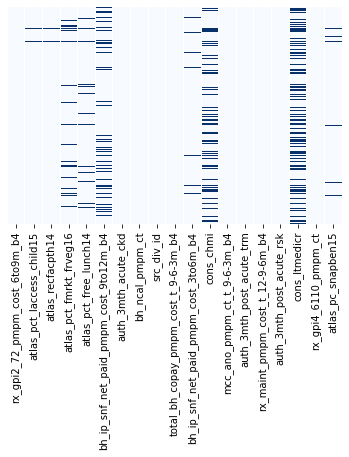

In [23]:
sns.heatmap(df.iloc[:,1:20].isnull(),yticklabels=False,cbar=False, cmap='Blues')
plt.show()

In [24]:
# Check missing percentage
missing = df.isnull().sum()
miss_perc = missing/len(df)
miss_perc

auth_3mth_post_acute_dia                    0.000000
rx_gpi2_72_pmpm_cost_6to9m_b4               0.000000
atlas_pct_laccess_child15                   0.006445
atlas_recfacpth14                           0.005038
atlas_pct_fmrkt_frveg16                     0.092029
                                              ...   
rx_gpi2_66_pmpm_ct                          0.000000
auth_3mth_acute_gus                         0.000000
rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4    0.000000
atlas_low_education_2015_update             0.004876
race_cd                                     0.016172
Length: 366, dtype: float64

In [25]:
miss_perc.describe()

count    366.000000
mean       0.026435
std        0.077025
min        0.000000
25%        0.000000
50%        0.000000
75%        0.004784
max        0.741778
dtype: float64

### Fill in Missing Values

In [26]:
org_cols = list(df.columns)

In [27]:
# fill in missing values for numerical columns with median
for i in org_cols:
    '''Fill in missing values according to data type'''
    if(df.dtypes[i] == 'float64')| (df.dtypes[i] == 'int64'):
        df[i].fillna(df[i].median(), inplace=True)
    
    #fill categorical null values with 'Unknown'
    elif(df.dtypes[i] == 'object'):
        df[i].fillna('Unknown', inplace=True)

In [28]:
missing_exp = df.isnull().sum()/len(df)
missing_exp.describe()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

### Check for outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

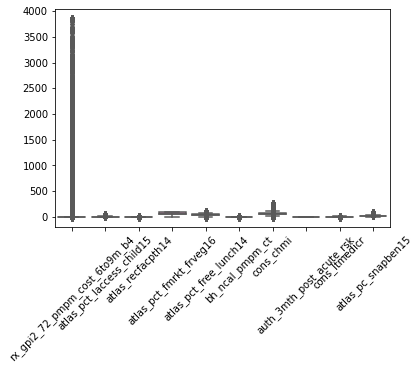

In [29]:
ax = sns.boxplot(data=df.iloc[:,1:20], orient="v", palette="Set2" )
plt.xticks(rotation=45)

### Transform Categorical Data

In [30]:
# Create dummy columns for all categorical data
df['covid_vaccination'].replace({'no_vacc': 0, 'vacc': 1}, inplace=True)

In [31]:
df2 = pd.get_dummies(data=df)

In [32]:
new_cols = list(df2.columns)

In [33]:
df2.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974842 entries, 0 to 974841
Columns: 1303 entries, rx_gpi2_72_pmpm_cost_6to9m_b4 to rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_Resolved
dtypes: float64(202), int64(51), uint8(1050)
memory usage: 2.8 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974842 entries, 0 to 974841
Columns: 366 entries, auth_3mth_post_acute_dia to race_cd
dtypes: float64(202), int64(51), object(113)
memory usage: 2.7+ GB


In [34]:
#check for categories that represents less than 5% of data
drop_cols = []

for i in new_cols:
    if i not in org_cols:
        if (df2[i].sum()/len(df2) < 0.05).all():
            drop_cols.append(i)

In [35]:
len(drop_cols)

695

In [36]:
df3 = df2.drop(columns = drop_cols)

In [37]:
df3

,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,auth_3mth_post_acute_rsk,cons_ltmedicr,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cons_hxmioc,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,bh_ncdm_ind,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_retirement_destination_2015_upda,atlas_naturalchangerate1016,ccsp_236_pct,auth_3mth_post_acute_ben,atlas_pct_laccess_hisp15,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,auth_3mth_acute_ccs_048,auth_3mth_acute_end,atlas_hiamenity,credit_bal_consumerfinance,rwjf_uninsured_pct,...,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_No Activity,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_No_Change,hedis_dia_hba1c_ge9_N,hedis_dia_hba1c_ge9_Unknown,ccsp_065_pmpm_ct_0.0,ccsp_065_pmpm_ct_0.0,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_Dec_1x-2x,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_Inc_1x-2x,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_New,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No Activity,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No_Change,bh_ip_snf_admit_days_pmpm_t_9-6-3m_b4_No Activity,bh_ip_snf_admit_days_pmpm_t_9-6-3m_b4_No_Change,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4_No Activity,auth_3mth_post_er_0,auth_3mth_post_er_0,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Inc_1x-2x,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_New,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No Activity,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No_Change,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Resolved,rx_gpi2_33_pmpm_ct_0to3m_b4_0.0,rx_gpi2_33_pmpm_ct_0to3m_b4_0.33333334,rx_gpi2_33_pmpm_ct_0to3m_b4_0.0,rx_gpi2_33_pmpm_ct_0to3m_b4_0.33333334,auth_3mth_post_acute_chf_0,auth_3mth_post_acute_chf_0,auth_3mth_dc_other_0,auth_3mth_dc_other_0,auth_3mth_bh_acute_mean_los_0.0,auth_3mth_bh_acute_mean_los_0.0,auth_3mth_post_acute_gus_0,auth_3mth_post_acute_gus_0,auth_3mth_acute_mus_0,auth_3mth_acute_mus_0,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_Dec_1x-2x,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_Inc_1x-2x,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_New,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_No Activity,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_No_Change
0,0.000000,7.910346,0.049413,0.000000,46.839102,0.0,67.0,0,4.0,8.068443,2366.225593,0.00,0.036550,22.614359,0.26716,0.904069,0.248279,9.0,0.0,5.0,9.803185,0.00,70.0,9.775188,1.458254,0,0.000000,0.0,2.255148,0.0,0,1.190413,14.424166,2.000000,1.150322,0,0,0.0,832.960852,0.071574,...,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
1,0.000000,1.730272,0.095624,60.000000,36.721923,0.0,69.0,0,3.0,12.354272,2926.079093,0.00,0.028851,19.627044,0.14265,0.721653,0.087810,9.0,0.0,6.0,10.081917,0.00,75.0,9.931234,1.063555,0,0.000000,0.0,3.093653,0.0,0,1.251418,27.267500,3.666667,2.447362,0,0,0.0,814.885956,0.080894,...,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0
2,0.000000,5.015501,0.022398,30.000000,39.605015,0.0,76.0,0,6.0,14.184090,4522.696898,0.17,0.086740,36.273675,0.25904,0.444301,0.103268,3.0,0.0,1.0,15.611655,4192.19,55.0,5.555760,2.516320,0,0.000000,0.0,3.323222,0.0,0,1.715413,23.571666,1.333333,2.212277,0,0,0.0,1796.896312,0.110481,...,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
3,2.266667,4.049586,0.070407,50.000000,93.694818,0.0,46.0,0,8.0,25.220000,3993.478363,0.00,0.167049,34.035432,0.27952,0.696737,0.087032,6.0,0.0,0.0,22.732829,0.00,66.0,2.118735,5.050701,0,0.000000,0.0,3.725334,0.0,0,1.879706,6.016667,1.333333,1.527418,0,0,0.0,961.138780,0.155642,...,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
4,0.000000,0.618606

In [38]:
df3.loc[:,'covid_vaccination'].value_counts(dropna=False)

0    805389
1    169453
Name: covid_vaccination, dtype: int64

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974842 entries, 0 to 974841
Columns: 608 entries, rx_gpi2_72_pmpm_cost_6to9m_b4 to rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_No_Change
dtypes: float64(202), int64(51), uint8(355)
memory usage: 2.2 GB


In [40]:
df3.describe()

,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,auth_3mth_post_acute_rsk,cons_ltmedicr,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cons_hxmioc,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,bh_ncdm_ind,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_retirement_destination_2015_upda,atlas_naturalchangerate1016,ccsp_236_pct,auth_3mth_post_acute_ben,atlas_pct_laccess_hisp15,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,auth_3mth_acute_ccs_048,auth_3mth_acute_end,atlas_hiamenity,credit_bal_consumerfinance,rwjf_uninsured_pct,...,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_No Activity,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_No_Change,hedis_dia_hba1c_ge9_N,hedis_dia_hba1c_ge9_Unknown,ccsp_065_pmpm_ct_0.0,ccsp_065_pmpm_ct_0.0,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_Dec_1x-2x,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_Inc_1x-2x,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_New,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No Activity,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No_Change,bh_ip_snf_admit_days_pmpm_t_9-6-3m_b4_No Activity,bh_ip_snf_admit_days_pmpm_t_9-6-3m_b4_No_Change,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4_No Activity,auth_3mth_post_er_0,auth_3mth_post_er_0,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Inc_1x-2x,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_New,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No Activity,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No_Change,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Resolved,rx_gpi2_33_pmpm_ct_0to3m_b4_0.0,rx_gpi2_33_pmpm_ct_0to3m_b4_0.33333334,rx_gpi2_33_pmpm_ct_0to3m_b4_0.0,rx_gpi2_33_pmpm_ct_0to3m_b4_0.33333334,auth_3mth_post_acute_chf_0,auth_3mth_post_acute_chf_0,auth_3mth_dc_other_0,auth_3mth_dc_other_0,auth_3mth_bh_acute_mean_los_0.0,auth_3mth_bh_acute_mean_los_0.0,auth_3mth_post_acute_gus_0,auth_3mth_post_acute_gus_0,auth_3mth_acute_mus_0,auth_3mth_acute_mus_0,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_Dec_1x-2x,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_Inc_1x-2x,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_New,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_No Activity,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_No_Change
count,974842.000000,9.748420e+05,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.0,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.0,974842.000000,974842.000000,974842.000000,974842.000000,974842.0,974842.000000,974842.000000,974842.000000,974842.000000,...,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000,974842.000000
mean,4.550529,4.977342e+00,0.090766,64.170120,46.459753,0.005982,64.910186,0.0,5.608075,17.927245,2596.806566,1.484015,0.166140,22.605289,0.290696,0.703305,0.156595,7.536607,0.051348,4.080142,11.199582,108.247121,56.872578,1.318302,2.409763,0.022420,6.908219,0.098619,1.782307,0.059097,0.0,1.467188,26.461259,2.431902,2.377208,0.0,0.000035,0.268911,1003.577264,0.11

# Exploratory Analysis

# Implement Machine Learning

## Split Train Test Data

### Linear Regression

### Random Forest

### XG Boost

## Cross Validation